In [ ]:
!pip install somoclu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sklearn
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from somoclu import Somoclu
from pandas import plotting 

from google.colab import files

In [ ]:
# 外部ファイルのアップロード
uploaded = files.upload()

Saving pokemon151.csv to pokemon151.csv


In [ ]:
df = pd.read_csv('pokemon151.csv',encoding="SHIFT-JIS")
 
print(df.shape)
df.head()

(151, 14)


,Num,Name,Type1,Type2,Ability1,Ability2,DreamAbility,HP,Attack,Defence,Sp_Atk,Sp_Def,Speed,Sum
0,1,フシギダネ,Grass,Poison,しんりょく,NaN,ようりょくそ,45,49,49,65,65,45,318
1,2,フシギソウ,Grass,Poison,しんりょく,NaN,ようりょくそ,60,62,63,80,80,60,405
2,3,フシギバナ,Grass,Poison,しんりょく,NaN,ようりょくそ,80,82,83,100,100,80,525
3,4,ヒトカゲ,Fire,NaN,もうか,NaN,サンパワー,39,52,43,60,50,65,309
4,5,リザード,Fire,NaN,もうか,NaN,サンパワー,58,64,58,80,65,80,405


In [ ]:
df.describe()

,Num,HP,Attack,Defence,Sp_Atk,Sp_Def,Speed,Sum
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225,407.642384
std,43.734045,28.590117,26.755421,26.916704,28.534199,24.208797,27.024598,99.875212
min,1.000000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,195.000000
25%,38.500000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,320.000000
50%,76.000000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,405.000000
75%,113.500000,80.000000,92.000000,84.000000,87.500000,80.000000,90.000000,490.000000
max,151.000000,250.000000,134.000000,180.000000,154.000000,125.000000,150.000000,680.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Num           151 non-null    int64 
 1   Name          151 non-null    object
 2   Type1         151 non-null    object
 3   Type2         67 non-null     object
 4   Ability1      151 non-null    object
 5   Ability2      97 non-null     object
 6   DreamAbility  143 non-null    object
 7   HP            151 non-null    int64 
 8   Attack        151 non-null    int64 
 9   Defence       151 non-null    int64 
 10  Sp_Atk        151 non-null    int64 
 11  Sp_Def        151 non-null    int64 
 12  Speed         151 non-null    int64 
 13  Sum           151 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 16.6+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


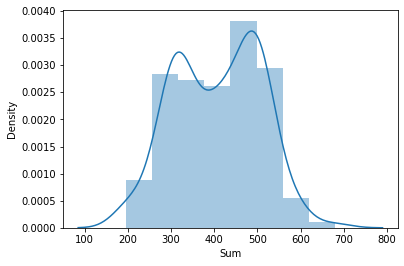

In [ ]:
sns.distplot(df["Sum"])
plt.show()

<class 'seaborn.axisgrid.PairGrid'>


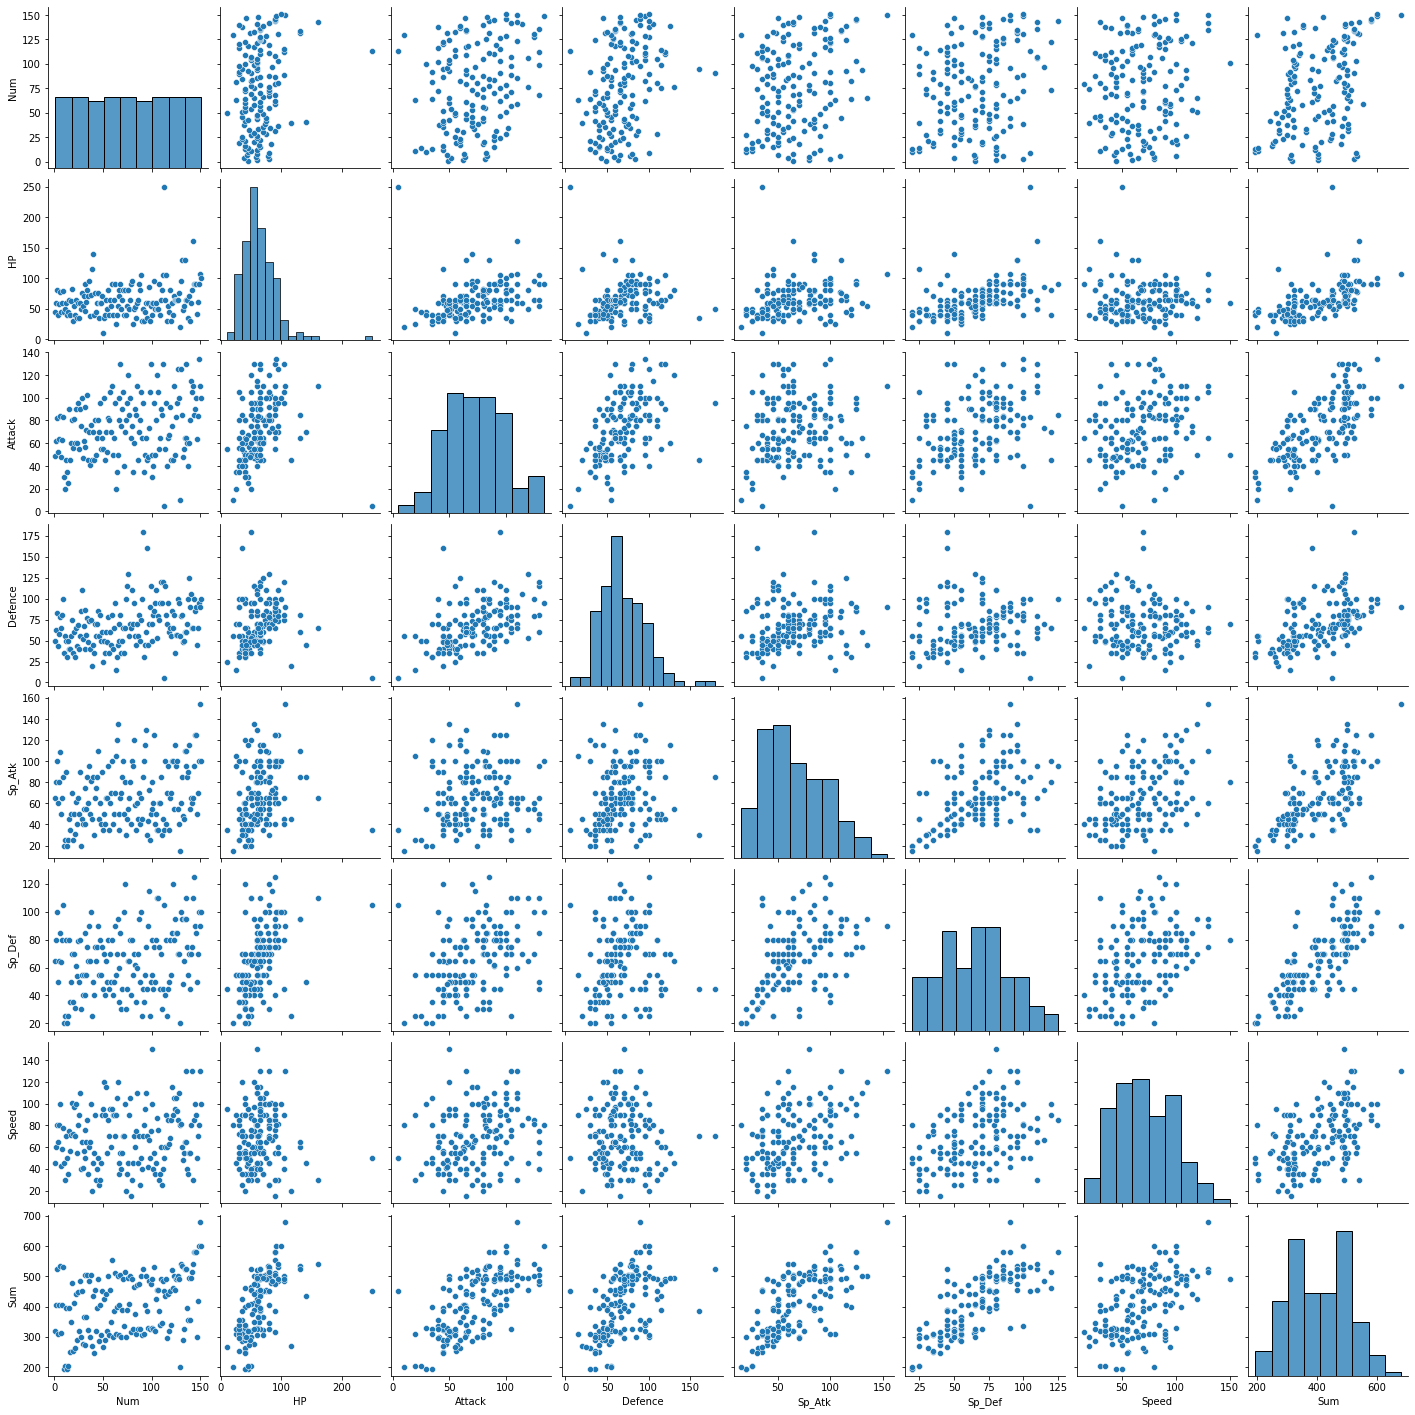

In [ ]:
pg = sns.pairplot(df)
print(type(pg))

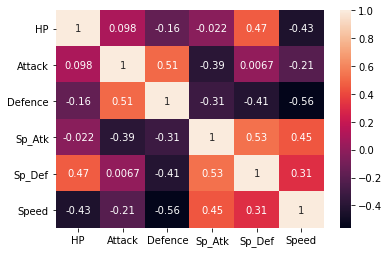

In [ ]:
df_corr = df.corr()
df_corr
 
corr_math = (df_corr.loc[:,['HP','Attack','Defence','Sp_Atk','Sp_Def','Speed']]).corr()

sns.heatmap(corr_math,annot = True)

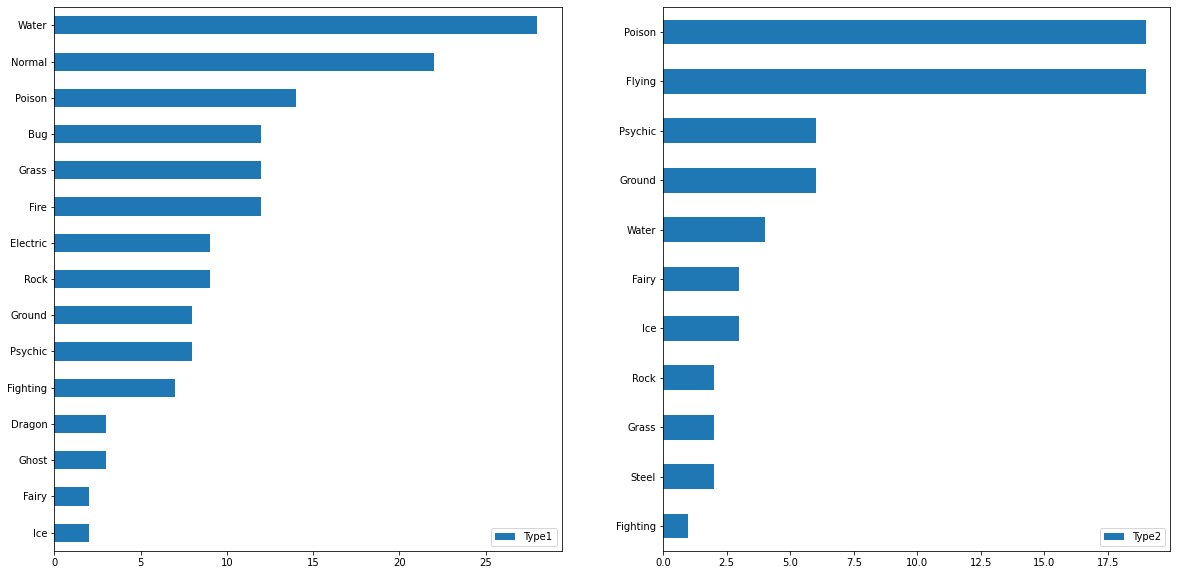

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
df['Type1'].value_counts().sort_values().plot(kind='barh')
plt.legend()

plt.subplot(1,2,2)
df['Type2'].value_counts().sort_values().plot(kind='barh')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

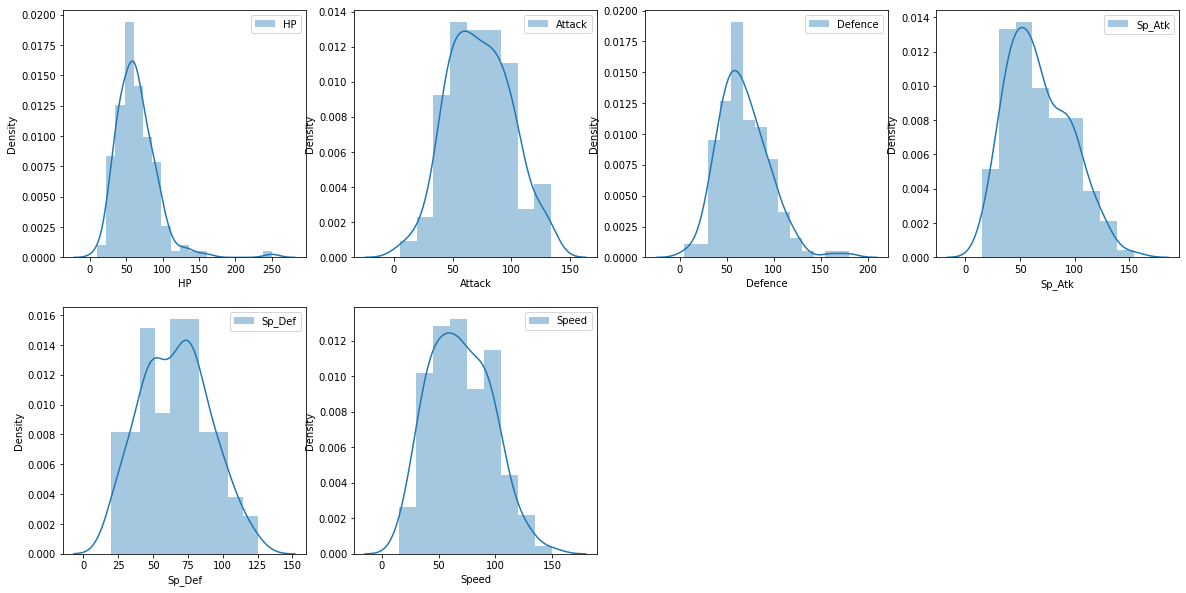

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.distplot(df['HP'],kde=True,label=('HP'))
plt.legend()

plt.subplot(2,4,2)
sns.distplot(df['Attack'],kde=True,label=('Attack'))
plt.legend()

plt.subplot(2,4,3)
sns.distplot(df['Defence'],kde=True,label=('Defence'))
plt.legend()

plt.subplot(2,4,4)
sns.distplot(df['Sp_Atk'],kde=True,label=('Sp_Atk'))
plt.legend()

plt.subplot(2,4,5)
sns.distplot(df['Sp_Def'],kde=True,label=('Sp_Def'))
plt.legend()

plt.subplot(2,4,6)
sns.distplot(df['Speed'],kde=True,label=('Speed'))
plt.legend()

In [ ]:
n_rows, n_columns = 100, 160
data = pd.concat([df['HP'], df['Attack'], df['Defence'],df['Sp_Atk'],df['Sp_Def'],df['Speed']],axis=1)
nmp=data.to_numpy()

In [ ]:
clusternum=17
#KMeansでクラスター分類
pred=KMeans(n_clusters=clusternum).fit_predict(nmp)
pred

array([ 6, 11,  4,  1, 11,  4,  6, 11,  4,  7,  7, 11,  7,  7, 10,  7,  7,
       10,  1, 10,  1, 10,  7, 10,  1, 10,  3, 14,  7, 11, 12,  7, 11,  4,
        6, 13,  6,  4,  8,  8,  7, 10,  6, 11, 13,  7, 11,  7,  2,  1, 10,
        1, 10,  6,  4,  1, 10, 11,  4,  1, 10, 12, 16, 16,  2,  7, 11, 12,
        7, 11,  4,  6,  4,  3,  3, 14, 10, 10,  7, 13,  6,  9, 11,  1, 10,
        6, 12,  7, 12,  3, 15, 16, 16,  2, 15,  6, 12,  3, 14,  1,  2,  7,
       13,  3,  3,  0,  0, 11,  3,  9,  3, 14,  5,  9, 12,  7,  9,  7, 12,
        1,  2,  2, 10,  2,  2,  4, 14, 10,  1, 12, 12,  7,  6, 13,  2,  4,
       11,  9,  9,  3, 14, 10, 12,  4,  4,  4,  7, 11,  4,  4,  4],
      dtype=int32)

In [ ]:
df['cluster_id']=pred
del(df['Num'])
del(df['Type1'])
del(df['Type2'])
del(df['Ability1'])
del(df['Ability2'])
del(df['DreamAbility'])
del(df['Sum'])
df

,Name,HP,Attack,Defence,Sp_Atk,Sp_Def,Speed,cluster_id
0,フシギダネ,45,49,49,65,65,45,6
1,フシギソウ,60,62,63,80,80,60,11
2,フシギバナ,80,82,83,100,100,80,4
3,ヒトカゲ,39,52,43,60,50,65,1
4,リザード,58,64,58,80,65,80,11
...,...,...,...,...,...,...,...,...
146,ミニリュウ,41,64,45,50,50,50,7
147,ハクリュー,61,84,65,70,70,70,11
148,カイリュー,91,134,95,100,100,80,4
149,ミュウツー,106,110,90,154,90,130,4


In [ ]:
df['cluster_id'].value_counts()

7     21
10    17
4     17
11    15
1     12
12    11
6     11
3     10
2      9
14     6
9      6
13     5
16     4
8      2
15     2
0      2
5      1
Name: cluster_id, dtype: int64

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3'),
 Text(0, 0, 'cluster4'),
 Text(0, 0, 'cluster5'),
 Text(0, 0, 'cluster6'),
 Text(0, 0, 'cluster7'),
 Text(0, 0, 'cluster8'),
 Text(0, 0, 'cluster9'),
 Text(0, 0, 'cluster10'),
 Text(0, 0, 'cluster11'),
 Text(0, 0, 'cluster12'),
 Text(0, 0, 'cluster13'),
 Text(0, 0, 'cluster14'),
 Text(0, 0, 'cluster15'),
 Text(0, 0, 'cluster16')]

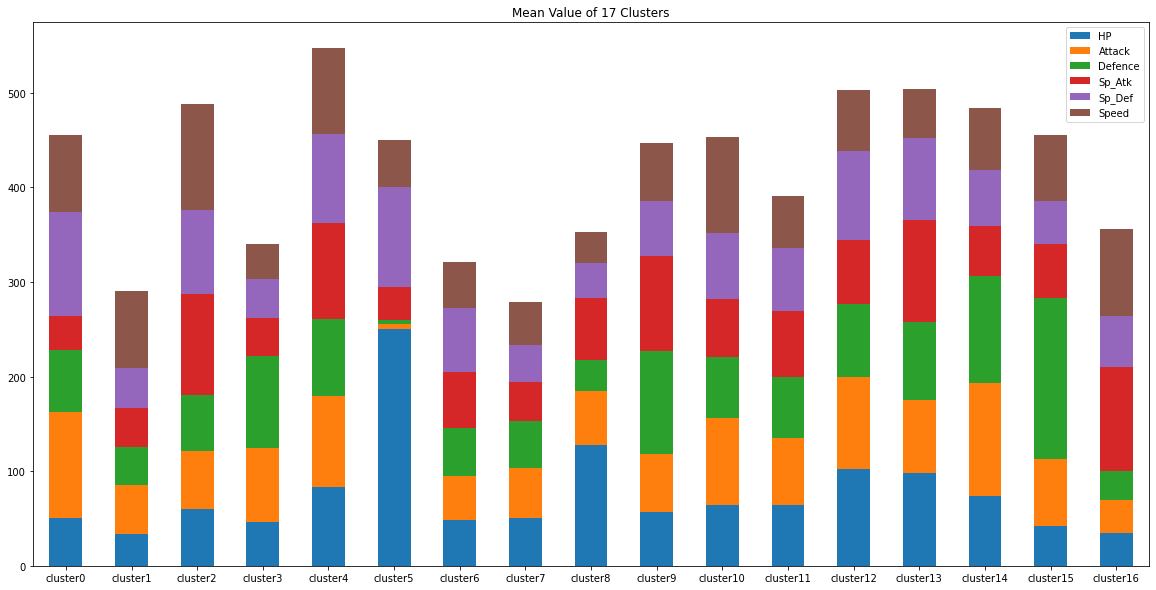

In [ ]:
clusterinfo = pd.DataFrame()
for i in range(clusternum):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 17 Clusters", figsize=(20,10))
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

In [ ]:
print(df[df['cluster_id'] == 5])

     Name   HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
112  ラッキー  250       5        5      35     105     50           5


In [ ]:
print(df[df['cluster_id'] == 4])

      Name   HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
2    フシギバナ   80      82       83     100     100     80           4
5    リザードン   78      84       78     109      85    100           4
8    カメックス   79      83      100      85     105     78           4
33   ニドキング   81     102       77      85      75     85           4
37   キュウコン   73      76       75      81     100    100           4
54   ゴルダック   80      82       78      95      80     85           4
58   ウインディ   90     110       80     100      80     95           4
70   ウツボット   80     105       65     100      70     70           4
72   ドククラゲ   80      70       65      80     120    100           4
125   ブーバー   65      95       57     100      85     93           4
135  ブースター   65     130       60      95     110     65           4
143  フリーザー   90      85      100      95     125     85           4
144   サンダー   90      90       85     125      90    100           4
145  ファイヤー   90     100       90     125      85

In [ ]:
print(df[df['cluster_id'] == 7])

      Name  HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
9    キャタピー  45      30       35      20      20     45           7
10   トランセル  50      20       55      25      25     30           7
12    ビードル  40      35       30      20      20     50           7
13    コクーン  45      25       50      25      25     35           7
15     ポッポ  40      45       40      35      35     56           7
16    ピジョン  63      60       55      50      50     71           7
22     アーボ  35      60       44      40      54     55           7
28   ニドラン♀  55      47       52      40      40     41           7
31   ニドラン♂  46      57       40      40      40     50           7
40    ズバット  40      45       35      30      40     55           7
45     パラス  35      70       55      45      55     25           7
47    コンパン  60      55       50      40      55     45           7
65   ワンリキー  70      80       50      35      35     35           7
68   マダツボミ  50      75       35      70      30     40        

In [ ]:
print(df[df['cluster_id'] == 15])

     Name  HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
90  パルシェン  50      95      180      85      45     70          15
94   イワーク  35      45      160      30      45     70          15


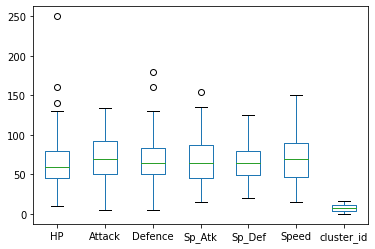

In [ ]:
df.plot.box()

In [ ]:
for i in range(clusternum):
  print("\ncluster:", i)
  print(df[df['cluster_id'] == i])


cluster: 0
      Name  HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
105  サワムラー  50     120       53      35     110     87           0
106  エビワラー  50     105       79      35     110     76           0

cluster: 1
      Name  HP  Attack  Defence  Sp_Atk  Sp_Def  Speed  cluster_id
3     ヒトカゲ  39      52       43      60      50     65           1
18    コラッタ  30      56       35      25      35     72           1
20   オニスズメ  40      60       30      31      31     70           1
24   ピカチュウ  35      55       40      50      50     90           1
49    ディグダ  10      55       25      35      45     95           1
51    ニャース  40      45       35      40      40     90           1
55    マンキー  40      80       35      35      45     70           1
59    ニョロモ  40      50       40      40      40     90           1
83    ドードー  35      85       45      35      35     75           1
99   ビリリダマ  40      30       50      55      55    100           1
119  ヒトデマン  30      45       55      7

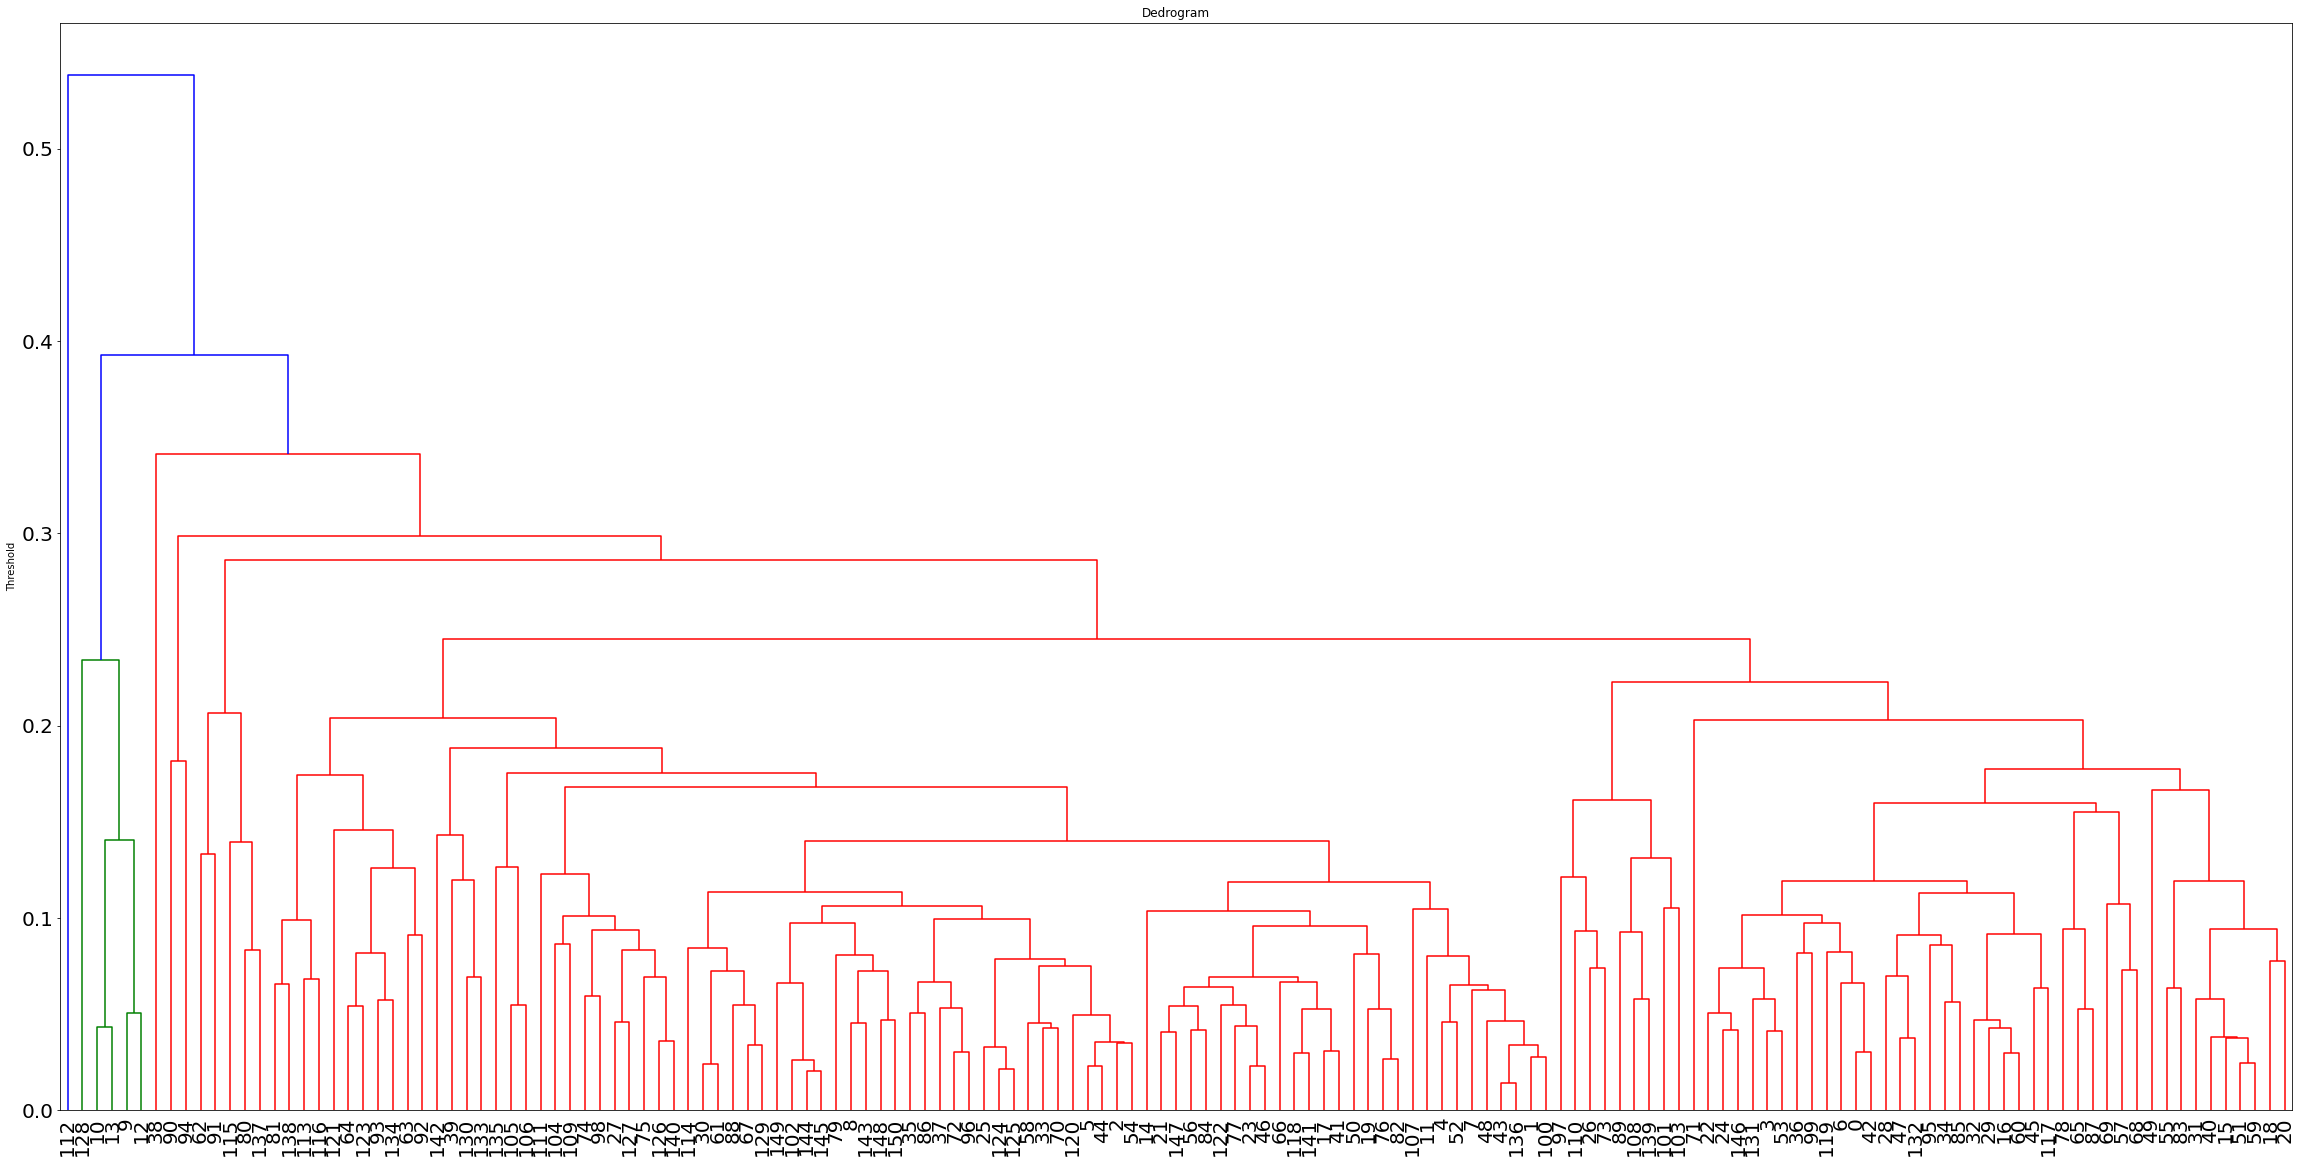

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(40, 20))
result1 = linkage(df.iloc[:, 1:6], metric = 'braycurtis', method = 'average')
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.tick_params(labelsize=20)
plt.show()

In [ ]:
del(df['Name'])
del(df['cluster_id'])
#主成分分析の実行
pca = PCA()
pca.fit(df)
# データを主成分空間に写像
feature = pca.transform(df)

In [ ]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-32.740976,-10.245277,10.866308,15.249529,-15.373198,11.472624
1,2.269953,-9.769909,8.287503,14.458253,-9.740083,11.495908
2,50.442091,-7.392374,3.363218,12.619607,-2.962991,11.011838
3,-38.914791,-21.517160,-0.762974,1.560040,-7.207760,-1.813156
4,0.107761,-21.699973,-0.777698,4.427781,-0.611626,-4.152783


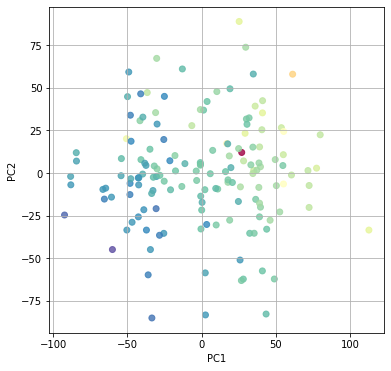

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

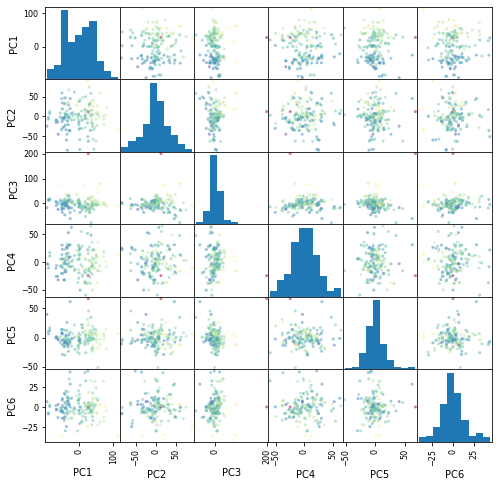

In [ ]:
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(df.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

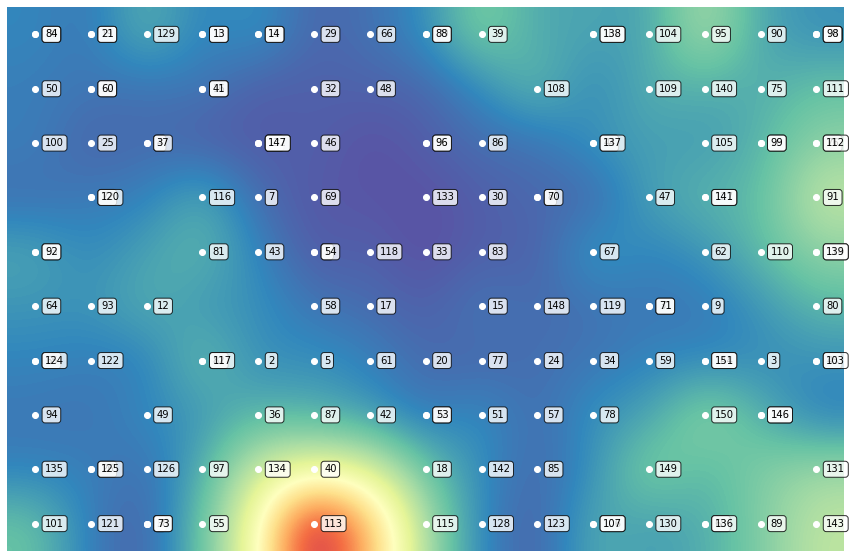

In [ ]:
pca = PCA(n_components=0.95)
X = pca.fit_transform(df)

n_rows = 10
n_cols = 15

som = Somoclu(n_rows=n_rows, n_columns=n_cols, initialization="pca", verbose=2)

som.train(data=X, epochs=1000)

new_df = pd.read_csv('pokemon151.csv',encoding="SHIFT-JIS")
som.view_umatrix(figsize=(15, 10), labels=new_df['Num'], bestmatches=True, filename="umatrix.png")